In [114]:
import pandas as pd
import json

In [115]:
df=pd.read_csv('acquisition_details.csv')
df.head()

,business_name,business_type,business_city,business_state,business_start_date,business_description,naics_code,fulltime_employees_count,fulltime_employees_annual_payroll,ever_filed_bankruptcy,...,inquiry_id,user_id,organization_id,id,meta_status,created_at,updated_at,business_address,business_zip_code,business_phone_number
0,Huels LLC,LLC,Pensacola,NY,2019-12-03 17:50:57.975+00,Eveniet similique avaritia dedecor usus totam ...,423520,90,529203096,f,...,6d31141e-a3ef-4067-a672-535d8d32466d,8c303314xvnwguwmnbf3p,d81dc152-c9d3-048b-1572-1f0c4594bf92,83b1247e-6899-46f3-b118-7231e0a0d4d9,t,2025-08-31 06:04:20.614+00,NaN,89120 Cortez Alley,98033,13252876377
1,"Sipes, Kilback and Purdy",Franchise,Port Carlo,AZ,2020-01-23 00:05:46.464+00,Verumtamen tamen curia. Stella casus volaticus...,112320,107,781194417,t,...,e9fcdb4d-aff3-4366-aa78-60e0a101cb38,l4dvk4durpywqbftlvit7,d81dc152-c9d3-048b-1572-1f0c4594bf92,3ff90ac0-bfaf-45d7-b52d-7027bc93dc43,t,2025-08-31 17:10:30.794+00,NaN,68064 Floyd Squares,19748,12643075799
2,"Batz, Blanda and Kerluke",LLC,Satterfieldview,AK,2024-03-18 15:48:53.062+00,Avaritia soleo thema alo mollitia. Summopere v...,811411,247,800000000,f,...,b17ceac5-f985-4e66-ba81-ee9221049156,oattxg2nrx9fqbn6394gp,d81dc152-c9d3-048b-1572-1f0c4594bf92,7b946434-5937-4ac9-8948-ad0be8d0d0a9,t,2025-08-25 19:34:03.477+00,NaN,17707 Giovanni Roads,52034,17484937757
3,"Marvin, Beer and Turcotte",C Corporation,Denton,SC,2019-06-17 09:46:37.77+00,Crepusculum non territo thymbra comedo adipisc...,541360,40,129842496,t,...,1ca1b2be-b922-4797-8545-758947a82d2f,dcfebje9ppwf7muik4pbq,d81dc152-c9d3-048b-1572-1f0c4594bf92,71d28dd8-35f2-4d0a-a640-b8ba2b11d446,t,2025-09-05 07:56:52.271+00,NaN,519 Gulgowski Gardens,4932,16433859096
4,Reichert and Sons,C Corporation,New Werner,PA,2020-05-27 14:17:45.038+00,Denuo viriliter ceno utique depraedor ullam de...,532289,146,800000000,t,...,cf8338b1-af72-48ac-8fa2-167e679e6d57,3u8yk6bfvahiiig7gt3fz,d81dc152-c9d3-048b-1572-1f0c4594bf92,ea5e8cd4-940f-4433-8cae-03596624c48a,t,2025-08-25 06:37:48.035+00,NaN,469 S 9th Street,63551,13059403603


In [116]:
df.shape

(22, 36)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   business_name                      22 non-null     object 
 1   business_type                      22 non-null     object 
 2   business_city                      22 non-null     object 
 3   business_state                     22 non-null     object 
 4   business_start_date                22 non-null     object 
 5   business_description               22 non-null     object 
 6   naics_code                         22 non-null     int64  
 7   fulltime_employees_count           22 non-null     int64  
 8   fulltime_employees_annual_payroll  22 non-null     int64  
 9   ever_filed_bankruptcy              22 non-null     object 
 10  bankruptcy_description             22 non-null     object 
 11  ongoing_lawsuits                   22 non-null     object 
 

In [118]:
cols = ['ever_filed_bankruptcy', 'ongoing_lawsuits']
df[cols] = df[cols].replace({'t': 1, 'f': 0})
df[cols] = df[cols].astype(int)

/tmp/ipython-input-1864362085.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols] = df[cols].replace({'t': 1, 'f': 0})


In [119]:
df.shape

(22, 36)

In [120]:
df['debts'] = df['debts'].apply(json.loads)
debt_df = df.explode('debts')
debt_df = pd.concat(
    [debt_df[['inquiry_id']], debt_df['debts'].apply(pd.Series)],
    axis=1
)
numeric_cols = ['interestRate', 'currentBalance', 'monthlyPayment', 'originalAmount']

acquisition_debts = debt_df.groupby('inquiry_id')[numeric_cols].agg(list).reset_index()
acquisition_debts.columns = [
    col if col == 'inquiry_id' else 'acquisition_debts_' + col
    for col in acquisition_debts.columns
]

acquisition_debts.head()

,inquiry_id,acquisition_debts_interestRate,acquisition_debts_currentBalance,acquisition_debts_monthlyPayment,acquisition_debts_originalAmount
0,18a5d7f2-0cc0-4296-af43-b72ad6170a83,"[11.74056542007796, 7.619190904594367]","[5810129, 32935920]","[126013, 758053]","[43995265, 54112374]"
1,1b851d5d-06e6-4f7a-b822-a35c307ef3c9,"[7.745378831370325, 5.409279496096087]","[12375478, 6260593]","[227204, 102752]","[70069686, 6710665]"
2,1ca1b2be-b922-4797-8545-758947a82d2f,"[11.295458353570165, 10.517851802769805]","[1659330, 6112224]","[38665, 223357]","[40500428, 38005662]"
3,36e252e9-90f3-42aa-bcea-65e5cb111ab2,"[5.024515880620459, 9.034494341126338]","[1599556, 6302677]","[25740, 178757]","[75828251, 11426289]"
4,3d87b6fc-d34e-428a-bae8-f28f3857fc7e,"[7.861427715295436, 7.021112701179941, 7.93771...","[26028256, 10042527, 3480202]","[712771, 267977, 119693]","[67999347, 11510520, 7153601]"


In [121]:
df['credit_debts'] = df['credit_debts'].apply(json.loads)
credit_debts_df = df.explode('credit_debts')
credit_debts_df = pd.concat(
    [credit_debts_df[['inquiry_id']], credit_debts_df['credit_debts'].apply(pd.Series)],
    axis=1
)

acquisition_credit_debts = (
    credit_debts_df.groupby('inquiry_id')['balance']
    .apply(list)
    .reset_index(name='credit_balances')
)
acquisition_credit_debts.columns = [
    col if col == 'inquiry_id' else 'acquisition_' + col
    for col in acquisition_credit_debts.columns
]

acquisition_credit_debts['acquisition_credit_balances'] = acquisition_credit_debts['acquisition_credit_balances'].apply(lambda x: [0 if pd.isna(i) else i for i in x])

acquisition_credit_debts.head()

,inquiry_id,acquisition_credit_balances
0,18a5d7f2-0cc0-4296-af43-b72ad6170a83,[0]
1,1b851d5d-06e6-4f7a-b822-a35c307ef3c9,[0]
2,1ca1b2be-b922-4797-8545-758947a82d2f,"[1052224.0, 3734020.0, 3798435.0, 1156669.0, 3..."
3,36e252e9-90f3-42aa-bcea-65e5cb111ab2,"[1048874.0, 4629660.0, 4626834.0, 4813972.0, 2..."
4,3d87b6fc-d34e-428a-bae8-f28f3857fc7e,"[3755834.0, 2881603.0, 3391575.0, 1669203.0]"


In [122]:
df = df[['inquiry_id','business_type', 'fulltime_employees_count', 'fulltime_employees_annual_payroll',
         'ever_filed_bankruptcy','ongoing_lawsuits','annual_revenue_year_one','annual_revenue_year_two',
         'annual_revenue_year_three','net_operating_income_year_one', 'net_operating_income_year_two',
         'net_operating_income_year_three']]

In [123]:
df.columns = [
    col if col == 'inquiry_id' else 'acquisition_' + col
    for col in df.columns
]

In [124]:
df.head()

,inquiry_id,acquisition_business_type,acquisition_fulltime_employees_count,acquisition_fulltime_employees_annual_payroll,acquisition_ever_filed_bankruptcy,acquisition_ongoing_lawsuits,acquisition_annual_revenue_year_one,acquisition_annual_revenue_year_two,acquisition_annual_revenue_year_three,acquisition_net_operating_income_year_one,acquisition_net_operating_income_year_two,acquisition_net_operating_income_year_three
0,6d31141e-a3ef-4067-a672-535d8d32466d,LLC,90,529203096,0,1,1323007740,1452295870,1333995312,53968812,59242800,54417022
1,e9fcdb4d-aff3-4366-aa78-60e0a101cb38,Franchise,107,781194417,1,0,1952986042,1782222165,1883054732,-84502917,-77114208,-81477089
2,b17ceac5-f985-4e66-ba81-ee9221049156,LLC,247,800000000,0,1,2000000000,1977650131,1818501557,345366796,341507344,314025028
3,1ca1b2be-b922-4797-8545-758947a82d2f,C Corporation,40,129842496,1,1,324606240,295084211,273596468,94048393,85494955,79269296
4,cf8338b1-af72-48ac-8fa2-167e679e6d57,C Corporation,146,800000000,1,0,2000000000,1870772357,1902526677,512388667,479281277,487416554


In [125]:
df.to_csv('acquisition_details_cleaned.csv', index=False)
acquisition_debts.to_csv('acquisition_debts.csv', index=False)
acquisition_credit_debts.to_csv('acquisition_credit_debts.csv', index=False)

In [127]:
df_external_data=pd.read_csv('external_data.csv')
df_external_data.head()

,id,provider_type,provider_data,provider_status,inquiry_id,organization_id,created_at
0,9469cafe-8e9c-43a8-86dc-bd1bb7b9f90b,crs_credit_report,"{""data"": {""models"": [{""score"": 762}]}}",success,4c534a15-b817-43d6-bc8c-38bf8a22c530,d81dc152-c9d3-048b-1572-1f0c4594bf92,2025-09-18 20:54:48.283
1,f487ded4-e3df-4186-9938-edbff4b180de,crs_credit_report,"{""data"": {""models"": [{""score"": 441}]}}",success,b795682e-d22f-4f81-ae08-d465d2b3e647,d81dc152-c9d3-048b-1572-1f0c4594bf92,2025-09-18 20:54:48.283
2,16d4ad3b-d549-43ad-bbbc-5439a4f41acc,crs_credit_report,"{""data"": {""models"": [{""score"": 708}]}}",success,6d31141e-a3ef-4067-a672-535d8d32466d,d81dc152-c9d3-048b-1572-1f0c4594bf92,2025-09-18 20:54:48.283
3,e20b3aaa-b376-497d-a2e7-ae82fed99ee4,crs_credit_report,"{""data"": {""models"": [{""score"": 455}]}}",success,ee406cbf-a250-4b75-85af-2e684fb8409a,d81dc152-c9d3-048b-1572-1f0c4594bf92,2025-09-18 20:54:48.283
4,17d7acf7-1971-47e8-8a08-723c8fe548b5,crs_credit_report,"{""data"": {""models"": [{""score"": 713}]}}",success,06ce7d90-bb7e-498f-baf6-b6114984b6a4,d81dc152-c9d3-048b-1572-1f0c4594bf92,2025-09-18 20:54:48.283


In [128]:
df_external_data['provider_data_score'] = df_external_data['provider_data'].apply(lambda x: json.loads(x)['data']['models'][0]['score'])

In [129]:
df_external_data=df_external_data[['inquiry_id','provider_data_score']]
df_external_data.head()

,inquiry_id,provider_data_score
0,4c534a15-b817-43d6-bc8c-38bf8a22c530,762
1,b795682e-d22f-4f81-ae08-d465d2b3e647,441
2,6d31141e-a3ef-4067-a672-535d8d32466d,708
3,ee406cbf-a250-4b75-85af-2e684fb8409a,455
4,06ce7d90-bb7e-498f-baf6-b6114984b6a4,713


In [130]:
df_external_data.to_csv('external_data_cleaned.csv', index=False)

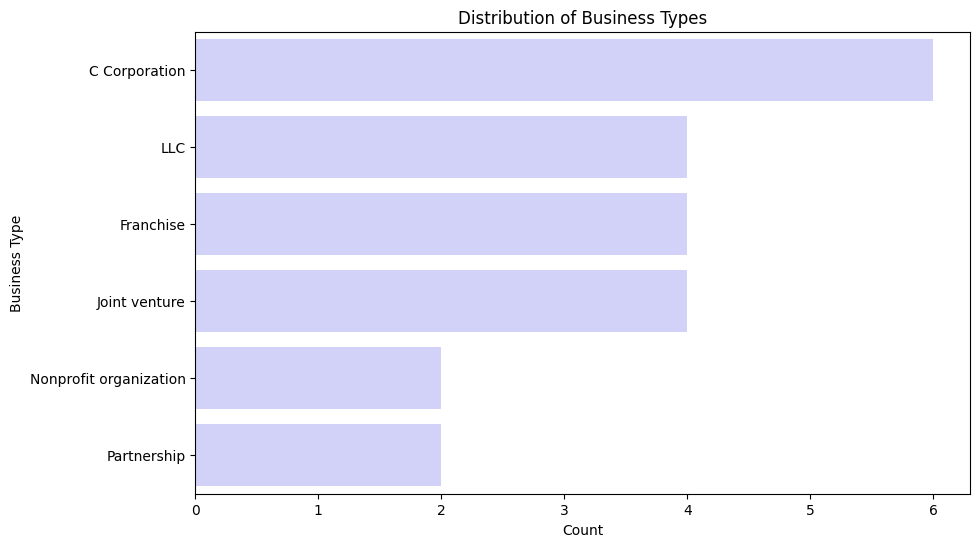

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='acquisition_business_type', color='#CCCCFF', order=df['acquisition_business_type'].value_counts().index)
plt.title('Distribution of Business Types')
plt.xlabel('Count')
plt.ylabel('Business Type')
plt.show()

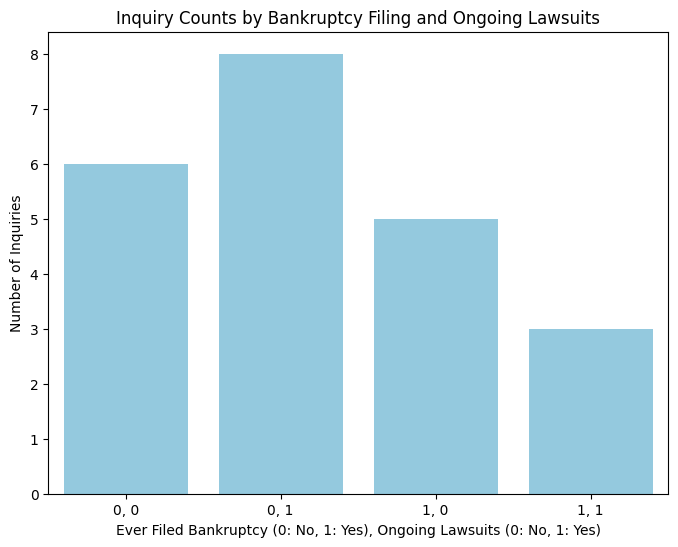

In [160]:
# Group by bankruptcy and lawsuits and count inquiries
bankruptcy_lawsuit_counts = df.groupby(['acquisition_ever_filed_bankruptcy', 'acquisition_ongoing_lawsuits']).size().reset_index(name='inquiry_count')

bankruptcy_lawsuit_counts['combination'] = bankruptcy_lawsuit_counts['acquisition_ever_filed_bankruptcy'].astype(str) + ', ' + bankruptcy_lawsuit_counts['acquisition_ongoing_lawsuits'].astype(str)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(data=bankruptcy_lawsuit_counts, x='combination', y='inquiry_count', color='skyblue')
plt.title('Inquiry Counts by Bankruptcy Filing and Ongoing Lawsuits')
plt.xlabel('Ever Filed Bankruptcy (0: No, 1: Yes), Ongoing Lawsuits (0: No, 1: Yes)')
plt.ylabel('Number of Inquiries')
plt.show()

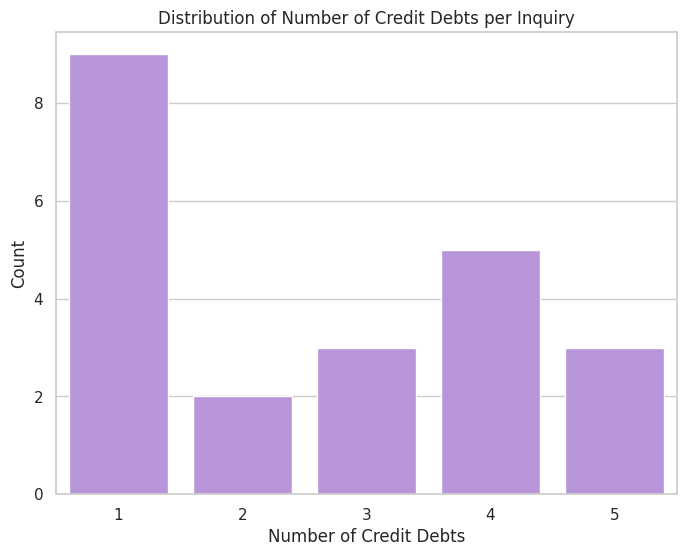

In [184]:
# Add a column for the number of credit debts per inquiry
acquisition_credit_debts['num_acquisition_credit_debts'] = acquisition_credit_debts['acquisition_credit_balances'].apply(len)

# Plot the distribution of the number of credit debts
plt.figure(figsize=(8, 6))
sns.countplot(data=acquisition_credit_debts, color='#b78ae3',x='num_acquisition_credit_debts')
plt.title('Distribution of Number of Credit Debts per Inquiry')
plt.xlabel('Number of Credit Debts')
plt.ylabel('Count')
plt.show()

In [164]:
interest_rates = [rate for sublist in acquisition_debts['acquisition_debts_interestRate'] for rate in sublist]
current_balances = [bal for sublist in acquisition_debts['acquisition_debts_currentBalance'] for bal in sublist]
monthly_payments = [pay for sublist in acquisition_debts['acquisition_debts_monthlyPayment'] for pay in sublist]
original_amounts = [amt for sublist in acquisition_debts['acquisition_debts_originalAmount'] for amt in sublist]

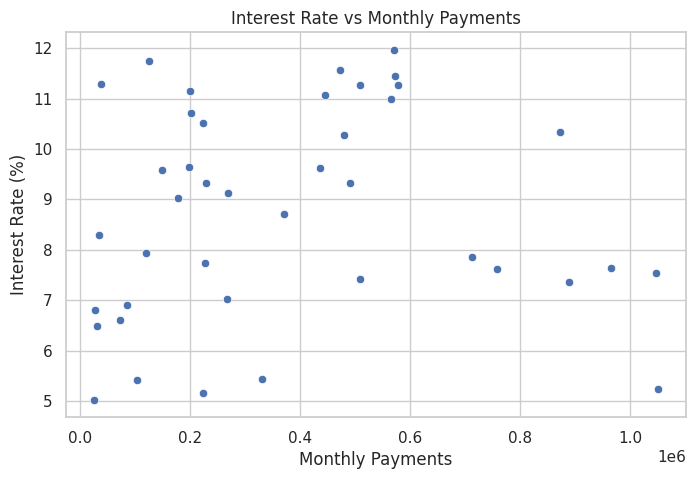

In [189]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=monthly_payments, y=interest_rates)
plt.title('Interest Rate vs Monthly Payments')
plt.xlabel('Monthly Payments')
plt.ylabel('Interest Rate (%)')
plt.show()

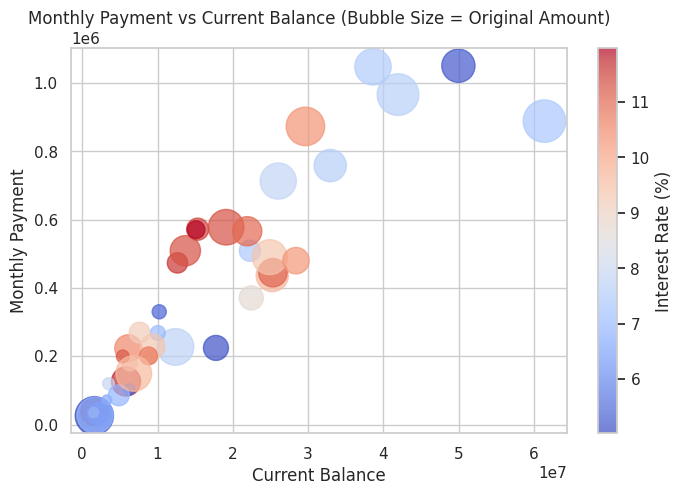

In [170]:
plt.figure(figsize=(8,5))
plt.scatter(current_balances, monthly_payments, s=[amt/1e5 for amt in original_amounts], c=interest_rates, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Interest Rate (%)')
plt.title('Monthly Payment vs Current Balance (Bubble Size = Original Amount)')
plt.xlabel('Current Balance')
plt.ylabel('Monthly Payment')
plt.show()
